In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
sns.set()


In [63]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Exploration

In [64]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [68]:
df.duplicated().sum(
    
)

np.int64(0)

In [69]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


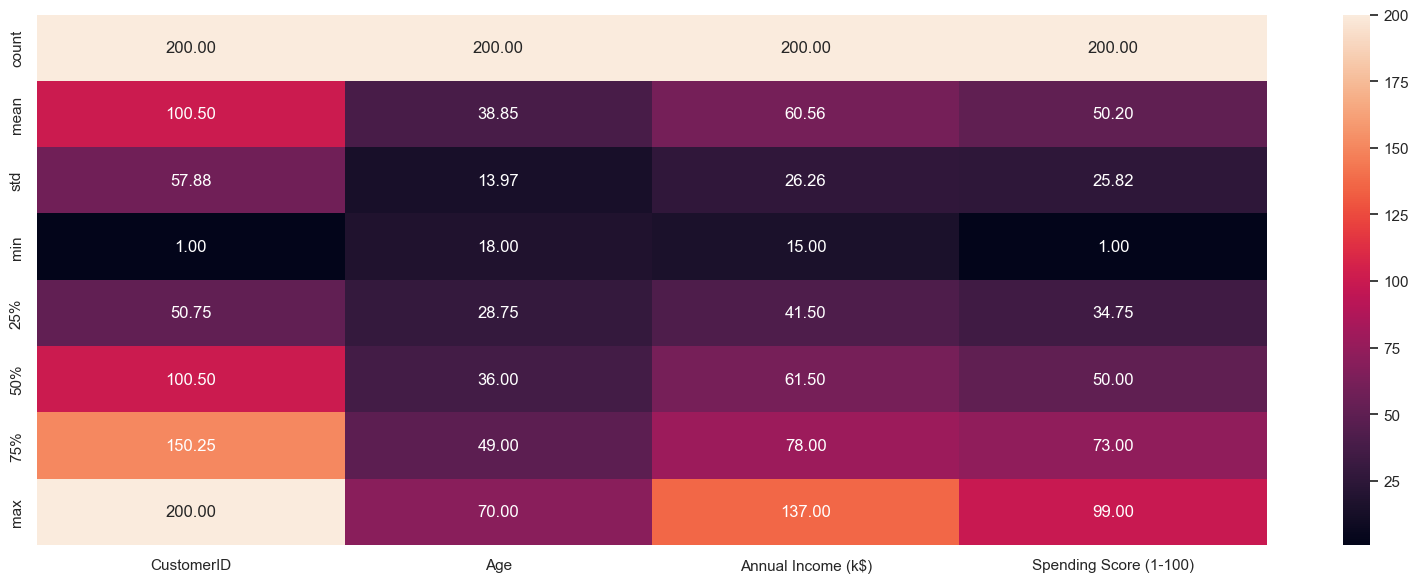

In [70]:
plt.figure(figsize=(16,6))
sns.heatmap(df.describe(),annot=True,fmt='0.2f')
plt.tight_layout()

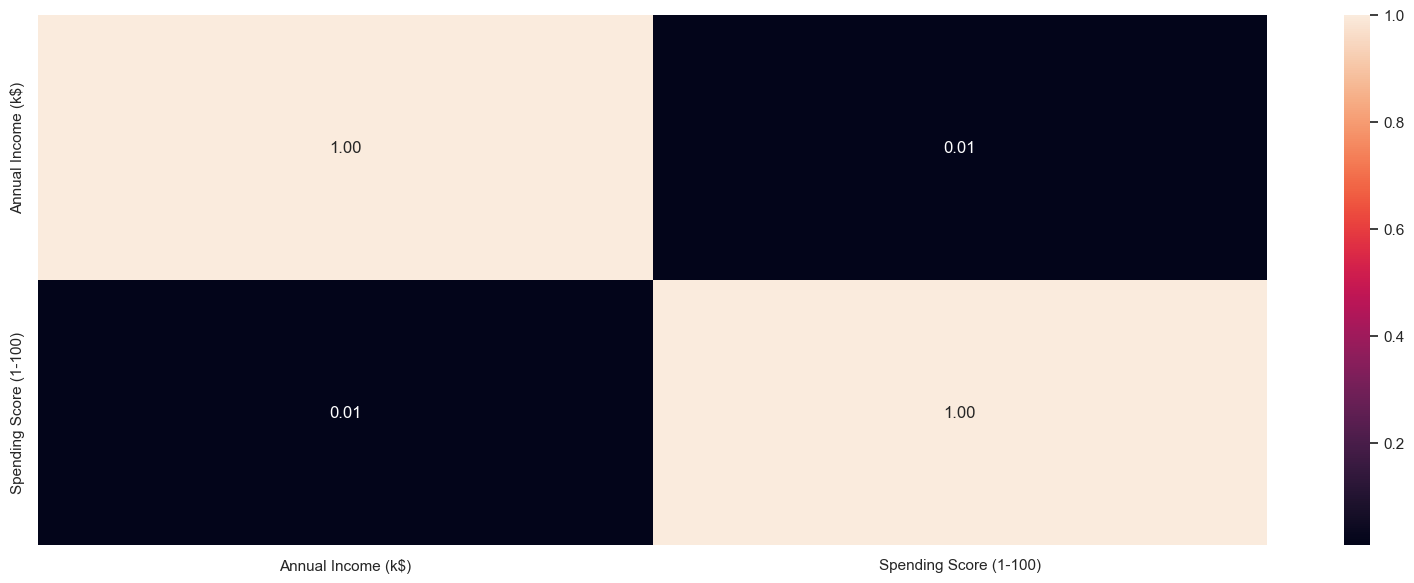

In [80]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,fmt='0.2f')
plt.tight_layout()

# Preprocessing

In [ ]:
plt.figure(figsize=(16,6))
df.boxplot()
plt.tight_layout()

In [ ]:
df.drop(columns=['CustomerID'],inplace=True,axis=1)

In [ ]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
iqr=q3-q1

In [ ]:
iqr

In [ ]:
upper=q3+1.5*iqr
lower=q1-1.5*iqr

In [ ]:
upper

In [ ]:
lower

In [ ]:
df.drop(df.loc[df['Annual Income (k$)']<lower].index,inplace=True)
df.drop(df.loc[df['Annual Income (k$)']>upper].index,inplace=True)

In [ ]:
plt.figure(figsize=(16,6))
df.boxplot()
plt.tight_layout()

In [ ]:
df.dtypes

In [ ]:
df['Genre']=df['Genre'].map({'Male':1,'Female':0})

In [ ]:
df.dtypes

# Scaling

In [72]:
Scaler=MinMaxScaler()
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [73]:
X=Scaler.fit_transform(X)

## Choose Best K Elbow Method

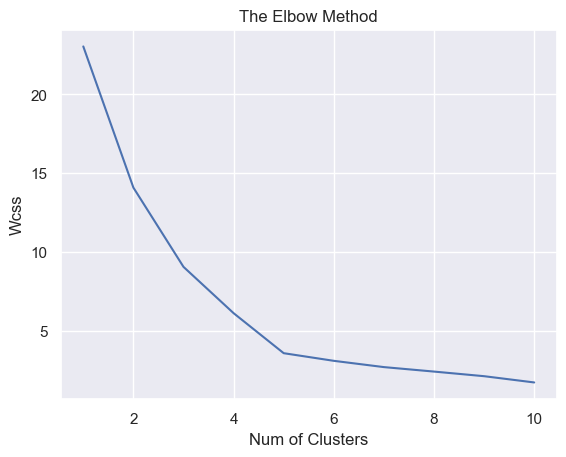

In [74]:
wcss=[]
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init='k-means++')
    kmean.fit(X)
    wcss.append(kmean.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('Wcss')
plt.show()

In [75]:
df=pd.DataFrame(X,columns=['Annual Income (k$)','Spending Score (1-100)'])

In [76]:
df

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


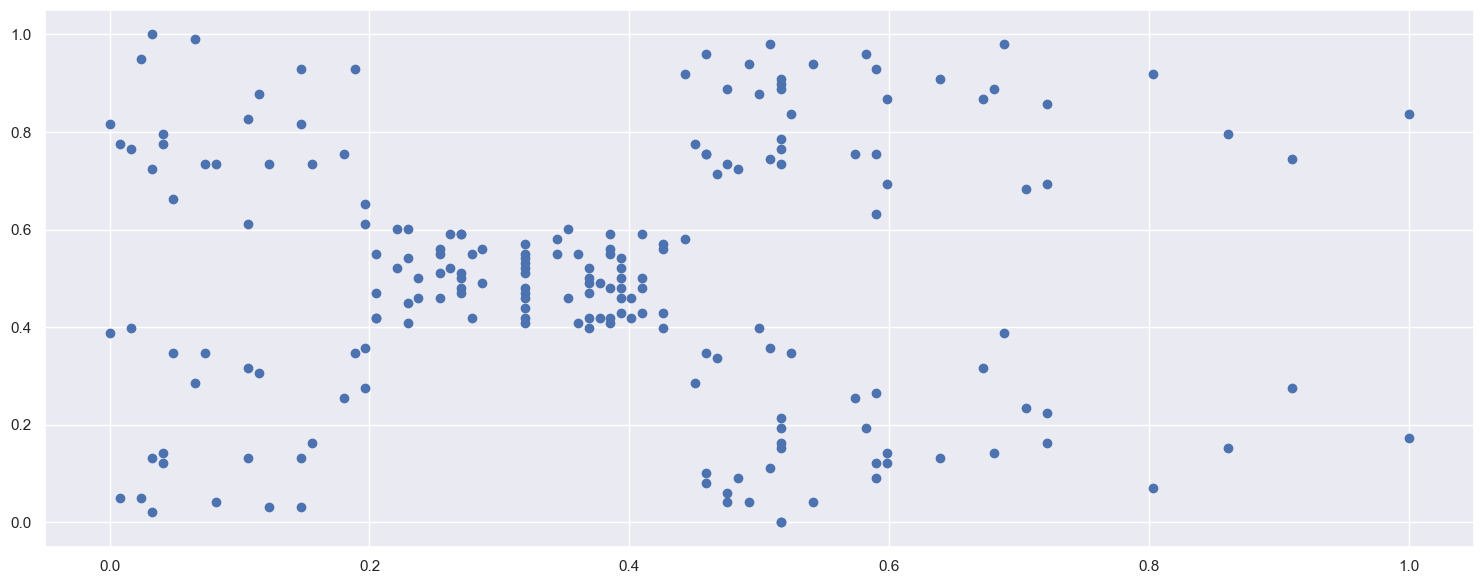

In [77]:
plt.figure(figsize=(15,6))
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.tight_layout()

In [78]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
km=KMeans(n_clusters=5,init='k-means++',random_state=42)
km.fit_predict(X)


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

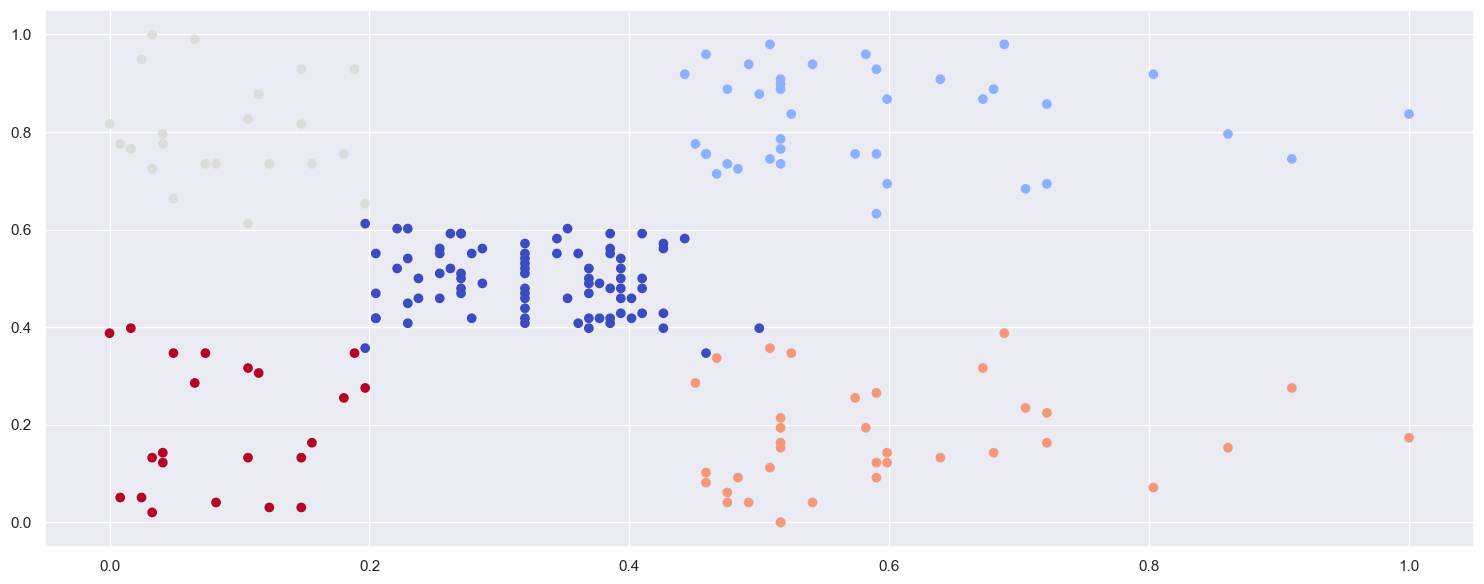

In [79]:
plt.figure(figsize=(15,6))
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=km.labels_,cmap='coolwarm')
plt.tight_layout()